# **About the Dataset**
This dataset is about hotels in Riyadh, the capital city of Saudi Arabia, and provides detailed information on various aspects of the hospitality industry. Riyadh is a prominent destination for business travelers, tourists, and pilgrims, making its hotel market an essential part of the city's infrastructure. The dataset includes information about hotel pricing, availability, geolocation, ratings, and other attributes, offering a comprehensive view of the hotels sector in this beautiful city. The data has been sourced from some of the most popular booking platforms and hotel websites, including Booking.com, Hotels.com, Expedia, Agoda.com, and Trip.com, among others. It is important to note that this dataset specifically refers to hotel bookings for the next two months, providing a short-term outlook on the Riyadh hotel market.

### **BY Mohammed Alsubaie, updated 4 months ago**

## **The Metadata**

- **hotel_id:**
A unique identifier for each hotel, used as a reference or primary key in the dataset.

- **hotel_name:**
The name of the hotel, including branding or location details.

- **SOURCE:**
Indicates the origin of the data including including Booking.com, Expedia, Agoda.com .. etc.

- **price:**
The final price customers pay for the hotel room, which includes the base price plus any additional fees (e.g., taxes, service charges, or surcharges).

- **base_price:**
The starting cost of the hotel room, excluding additional fees like taxes or service charges. In some cases, this may equal the final price if no extra charges are applied.

- **checkIn:**
The date (and possibly time) when the guest is expected to check into the hotel.

- **checkOut:**
The date (and possibly time) when the guest is expected to check out of the hotel.

- **count:**
number of reviews.

- **rating:**
A performance or quality score for the hotel, often based on customer reviews or a rating system (e.g., 1 to 5 stars).

- **Info:**
Additional descriptive information about the hotel, such as amenities, policies, or other details.

- **latitude:**
The geographic latitude of the hotel’s location, used for mapping or geospatial analysis.

- **longitude:**
The geographic longitude of the hotel’s location, used for mapping or geospatial analysis.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
# Read the Excel file
df = pd.read_excel('/content/Riyadh_Hotels.xlsx')

In [4]:
#print(df.head())  # Display the first few rows of the dataset
print("\nData Types:")
print(df.dtypes)  # Display the data types of each column
print("\nData Description:")
print(df.describe())  # Display summary statistics of numerical columns
print("\nMissing Values:")
print(df.isnull().sum())  # Display the count of missing values in each column
print("\nUnique Values:")
print(df.nunique())  # Display the count of unique values in each column


Data Types:
hotel_id        int64
hotel_name     object
SOURCE         object
price         float64
base_price    float64
checkIn        object
checkOut       object
count           int64
rating        float64
Info           object
latitude      float64
longitude     float64
dtype: object

Data Description:
           hotel_id        price   base_price        count       rating  \
count  1.089000e+03  1029.000000   840.000000  1089.000000  1089.000000   
mean   1.094511e+07  1274.821429   867.334821   331.359045     4.232323   
std    9.489783e+06  1189.632815   646.289942   405.379439     0.575002   
min    2.991900e+05    71.250000     3.750000     1.000000     2.500000   
25%    1.748545e+06   588.750000   502.500000    54.000000     4.000000   
50%    8.470987e+06   813.750000   690.000000   214.000000     4.500000   
75%    1.686598e+07  1605.000000  1091.250000   407.000000     4.500000   
max    2.805409e+07  8617.500000  3701.250000  1626.000000     5.000000   

         latit

In [5]:
# Display the first few rows to verify the data
df.head()

,hotel_id,hotel_name,SOURCE,price,base_price,checkIn,checkOut,count,rating,Info,latitude,longitude
0,15215188,Fairmont Riyadh,all.accor.com,1605.00,NaN,2025-01-02,2025-01-03,220,4.5,NaN,24.808397,46.718050
1,9702375,Rosh Rayhaan by Rotana,Official Site,813.75,693.75,2025-01-02,2025-01-03,1311,4.5,"['Free breakfast available', 'Free cancellation']",24.700346,46.682137
2,15756839,Hilton Riyadh Hotel & Residences,Booking.com,1128.75,1128.75,2025-01-02,2025-01-03,1626,4.5,NaN,24.785522,46.727880
3,24143026,Joudyan Hotel,MakeMyTrip,588.75,472.50,2025-01-02,2025-01-03,317,5.0,"['Free breakfast available', 'Free cancellation']",24.713552,46.675297
4,969150,"Holiday Inn Riyadh - al Qasr, an IHG hotel",Booking.com,633.75,633.75,2025-01-02,2025-01-03,1073,4.5,NaN,24.683914,46.688030


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hotel_id    1089 non-null   int64  
 1   hotel_name  1089 non-null   object 
 2   SOURCE      1089 non-null   object 
 3   price       1029 non-null   float64
 4   base_price  840 non-null    float64
 5   checkIn     1089 non-null   object 
 6   checkOut    1089 non-null   object 
 7   count       1089 non-null   int64  
 8   rating      1089 non-null   float64
 9   Info        331 non-null    object 
 10  latitude    651 non-null    float64
 11  longitude   651 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 102.2+ KB


In [7]:
df.shape

(1089, 12)

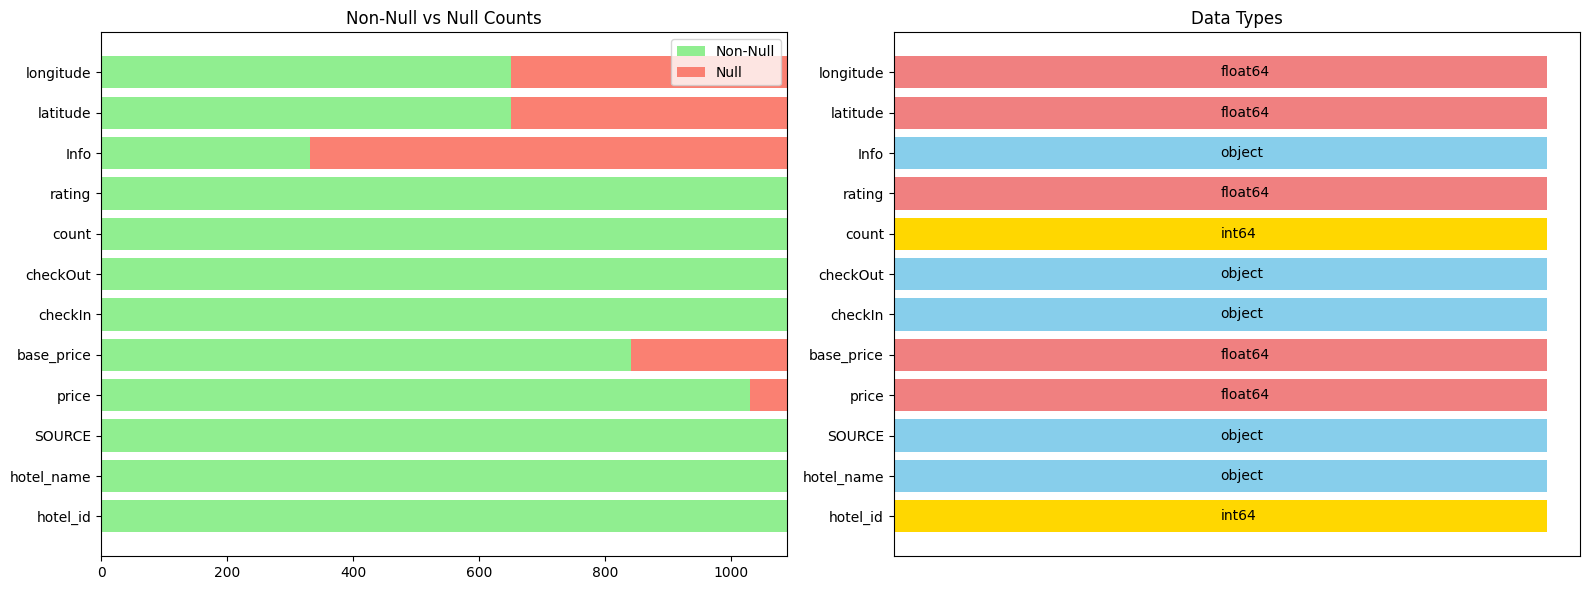

In [8]:
# Get DataFrame info
null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()
dtypes = df.dtypes

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Non-null counts
ax1.barh(df.columns, non_null_counts, color='lightgreen', label='Non-Null')
ax1.barh(df.columns, null_counts, left=non_null_counts, color='salmon', label='Null')
ax1.set_title("Non-Null vs Null Counts")
ax1.legend()

# Subplot 2: Data types
dtype_colors = {'object': 'skyblue', 'int64': 'gold', 'float64': 'lightcoral', 'bool': 'plum'}
ax2.barh(df.columns, [1]*len(df.columns), color=[dtype_colors.get(str(dt), 'gray') for dt in dtypes])
ax2.set_title("Data Types")
ax2.set_xticks([])
for i, dt in enumerate(dtypes):
    ax2.text(0.5, i, str(dt), va='center')

plt.tight_layout()
plt.show()

In [9]:
null_values = df.isnull().sum()
display(null_values)

,0
hotel_id,0
hotel_name,0
SOURCE,0
price,60
base_price,249
checkIn,0
checkOut,0
count,0
rating,0
Info,758


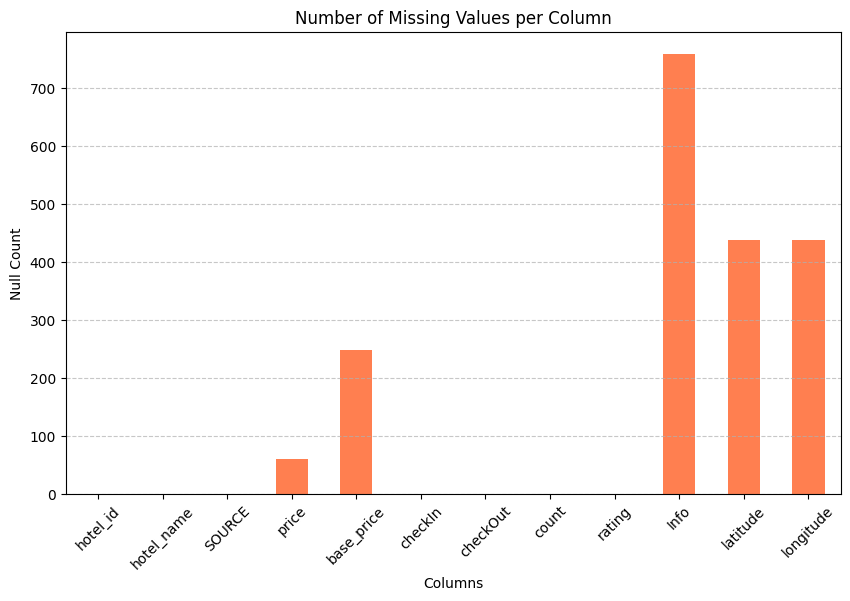

In [10]:
# Plot
plt.figure(figsize=(10, 6))
null_values.plot(kind='bar', color='coral')
plt.title("Number of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Null Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# Display the duplicated rows
duplicated_rows = df[df.duplicated()]
display(duplicated_rows)

,hotel_id,hotel_name,SOURCE,price,base_price,checkIn,checkOut,count,rating,Info,latitude,longitude
12,15215188,Fairmont Riyadh,all.accor.com,1605.00,NaN,2025-01-02,2025-01-03,220,4.5,NaN,24.808397,46.71805
29,23569851,Fairmont Ramla Serviced Residences,all.accor.com,1518.75,NaN,2025-01-02,2025-01-03,121,4.5,NaN,NaN,NaN
48,23569851,Fairmont Ramla Serviced Residences,all.accor.com,2542.50,NaN,2025-01-29,2025-02-03,121,4.5,NaN,NaN,NaN
127,301864,Sheraton Riyadh Hotel & Towers,Sheraton.com,1207.50,NaN,2025-01-25,2025-01-28,407,4.0,"['Free breakfast available', 'Free cancellatio...",NaN,NaN
133,26451032,The St. Regis Riyadh,StRegis.com,3761.25,NaN,2025-01-25,2025-01-28,54,5.0,NaN,NaN,NaN
170,301864,Sheraton Riyadh Hotel & Towers,Sheraton.com,1091.25,NaN,2025-01-05,2025-01-07,407,4.0,NaN,NaN,NaN
199,301864,Sheraton Riyadh Hotel & Towers,Sheraton.com,1061.25,NaN,2025-01-17,2025-01-21,407,4.0,NaN,NaN,NaN
248,26451032,The St. Regis Riyadh,StRegis.com,2636.25,NaN,2025-01-10,2025-01-13,54,5.0,NaN,NaN,NaN
273,26451032,The St. Regis Riyadh,StRegis.com,2748.75,NaN,2025-01-25,2025-01-27,54,5.0,NaN,NaN,NaN
389,301864,Sheraton Riyadh Hotel & Towers,Sheraton.com,1548.75,NaN,2025-02-16,2025-02-18,407,4.0,NaN,NaN,NaN


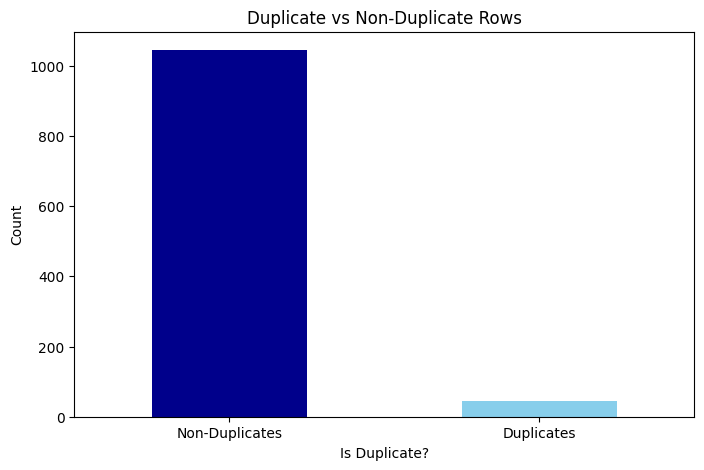

In [12]:
duplicate_counts = df.duplicated(keep=False).value_counts()  # Count duplicates (keeping all occurrences)

# Plot
plt.figure(figsize=(8, 5))
duplicate_counts.plot(kind='bar', color=['Darkblue', 'skyblue'])
plt.title("Duplicate vs Non-Duplicate Rows")
plt.xlabel("Is Duplicate?")
plt.ylabel("Count")
plt.xticks([0, 1], ["Non-Duplicates", "Duplicates"], rotation=0)
plt.show()

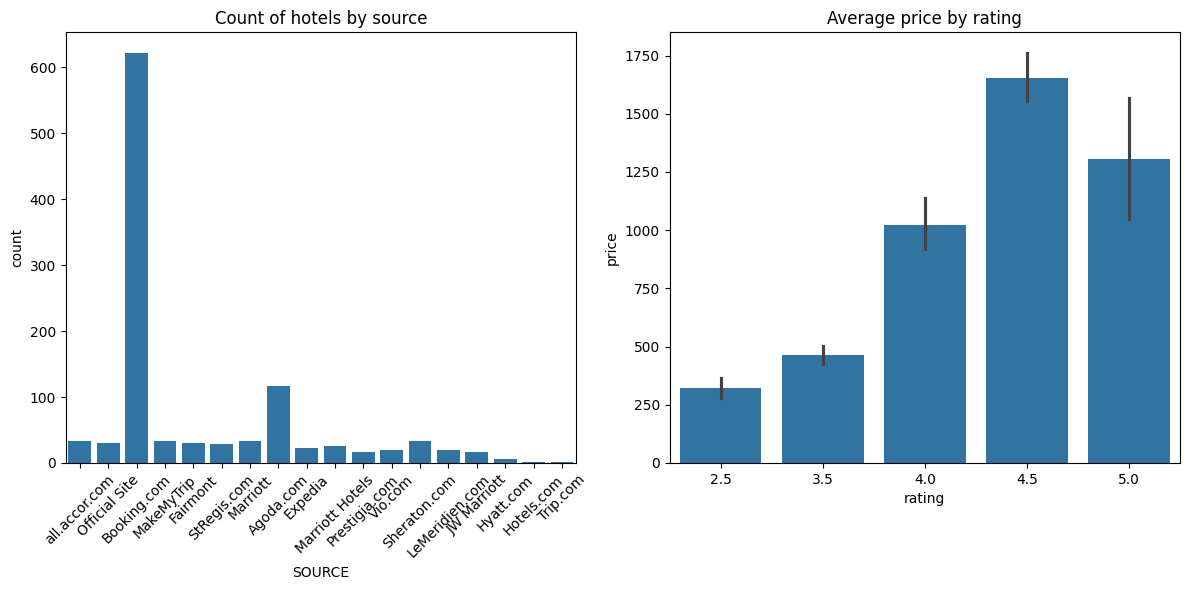

In [15]:
# Data visualization
plt.figure(figsize=(12, 6))

# Count of hotels by source
plt.subplot(1, 2, 1)
sns.countplot(x='SOURCE', data=df)
plt.xticks(rotation=45)
plt.title('Count of hotels by source')

# Average price by rating
plt.subplot(1, 2, 2)
sns.barplot(x='rating', y='price', data=df)
plt.title('Average price by rating')

plt.tight_layout()
plt.show()

In [16]:
!pip install pandas plotly

In [17]:
# Create interactive visualizations
# Scatter plot of hotel ratings vs. prices
fig1 = px.scatter(df, x='rating', y='price', color='count', size='count', hover_data=['hotel_name'], title='Hotel Ratings vs. Prices')

# Box plot of hotel prices by source
fig3 = px.box(df, x='SOURCE', y='price', title='Hotel Prices by Source', points='all')

# Line chart showing hotel prices over time (check-in date)
df['checkIn'] = pd.to_datetime(df['checkIn'])
fig4 = px.line(df, x='checkIn', y='price', color='SOURCE', title='Hotel Prices Over Time', labels={'price': 'Price (USD)'})

# Pie chart showing the distribution of hotel ratings
fig5 = px.pie(df, names='rating', title='Hotel Rating Distribution')

# Bar chart showing the average prices of hotels by rating
avg_prices_by_rating = df.groupby('rating')['price'].mean().reset_index()
fig6 = px.bar(avg_prices_by_rating, x='rating', y='price', title='Average Hotel Prices by Rating', labels={'price': 'Average Price (USD)'})

# Display the plots
fig1.show()
fig3.show()
fig5.show()
fig6.show()